In [51]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../") 

from importlib import reload
from tblib import lattice
from tblib import hamiltonian
from tblib import plotting
from tblib import sc_AHM

reload(lattice)
reload(hamiltonian)
reload(plotting)
reload(sc_AHM)

<module 'tblib.sc_AHM' from 'c:\\Users\\atsch\\Desktop\\MasterVorlesungen\\Masterthesis\\Code\\tests\\..\\tblib\\sc_AHM.py'>

# Test of self consistency
- selfconsistent calculation of meanfield cooper and hatree-fock channels
- plots show evolution of those for each site group (dDSL), filling factor $\nu$ and chemical potential $\mu$
- Band structure and DOS shown for additional verification

In [61]:
N=4
m = -0.5
n = N**2-N+1
lat = lattice.dDiagonallyStripedLattice(N=N)
ham = hamiltonian.dDSLmodel(N=N, delta=np.ones(n), T=0, U=np.ones(n), nu=n, ns=np.ones(n), mu=np.ones(n))

In [62]:
dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=300, alpha=0.3, g=1e-4)

In [63]:
ham.delta

array([0.22727665+9.86810171e-19j, 0.23633635-6.82614710e-19j,
       0.23633635+3.06997052e-18j, 0.04572131+4.27757237e-19j,
       0.07971702+1.70750128e-19j, 0.22727665+7.53978486e-19j,
       0.0746493 +1.49921376e-18j, 0.22727665+2.86446267e-18j,
       0.23633635-7.67039076e-19j, 0.0746493 +1.88124560e-18j,
       0.22727665-1.84200373e-18j, 0.23633635+1.26564914e-18j,
       0.07971702+9.51395115e-20j])

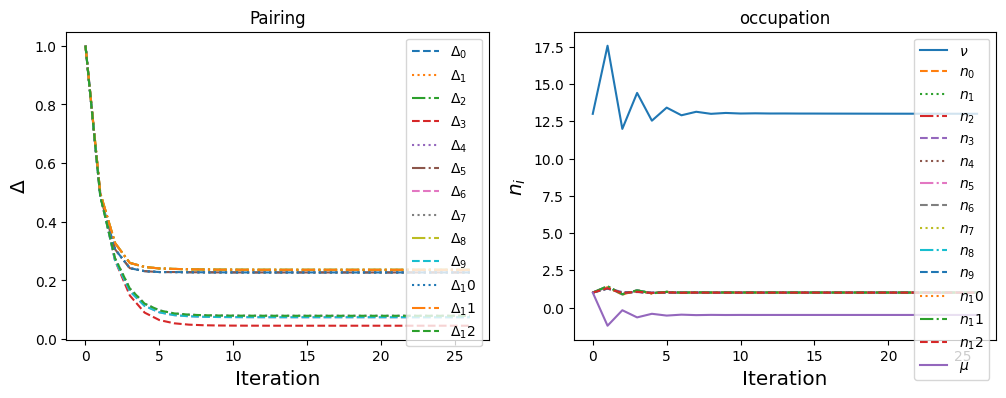

In [71]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))
axes[0].set_title('Pairing')
axes[1].set_title('occupation')

axes[0].set_xlabel('Iteration', size='x-large')
axes[0].set_ylabel(r'$\Delta$', size='x-large')
#axes[0].set_xticks(size='x-large')
#axes[0].set_yticks(size='x-large')

axes[1].set_xlabel('Iteration', size='x-large')
axes[1].set_ylabel(r'$n_i$', size='x-large')
#axes[1].set_xticks(size='x-large')
#axes[1].set_yticks(size='x-large')

colors=['dashed', 'dotted', 'dashdot']

for i,d in enumerate(dels):
    ax0 = axes[0].plot(np.arange(len(dels[0])), np.real(d), linestyle=colors[i%3], label = f'$\Delta_{i}$')

s1 = np.sum(nus, axis=0)

axes[1].plot(np.arange(len(s1)), s1, label = r'$\nu$')
for i,n in enumerate(nus):
    ax1 = axes[1].plot(np.arange(len(s1)),nus[i],linestyle=colors[i%3], label=f'$n_{i}$')
axes[1].plot(np.arange(len(s1)),mus[0], label=r'$\mu$')

   
axes[0].legend()
axes[1].legend()
plt.show()

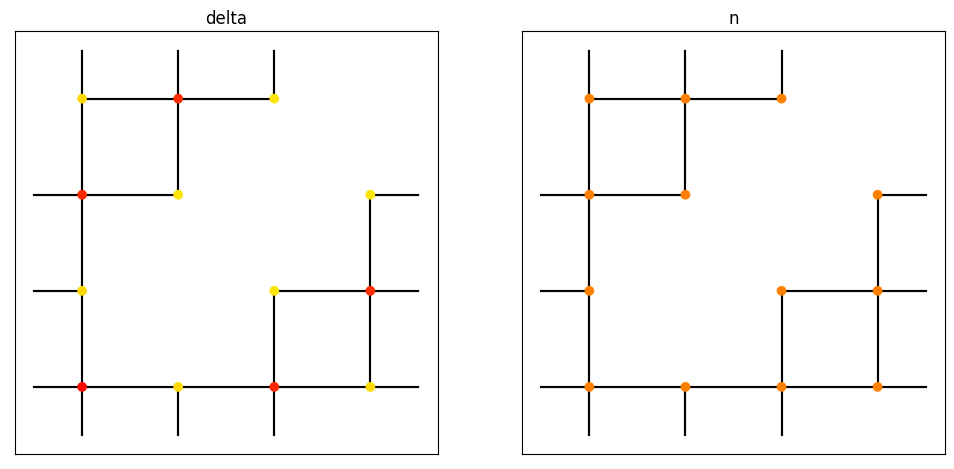

In [65]:
fig, axes = plt.subplots(ncols = 2, figsize=(12,9))

lattices = [lattice.dDiagonallyStripedLattice(N=N)]

labels = [f'delta', f'n']
props = [ham.delta, ham.ns]

g = []
for i, lats in enumerate(lattices):
    for j, p in enumerate(props):
        
        field = p#ham.lat.striped_props(p)#[p[ham.lat.map_diag[i]] for i in range(ham.n)]
        s = lat.plot_nn(axes[j], field=np.real(field), cmap='autumn')
        axes[j].set_title(labels[j])




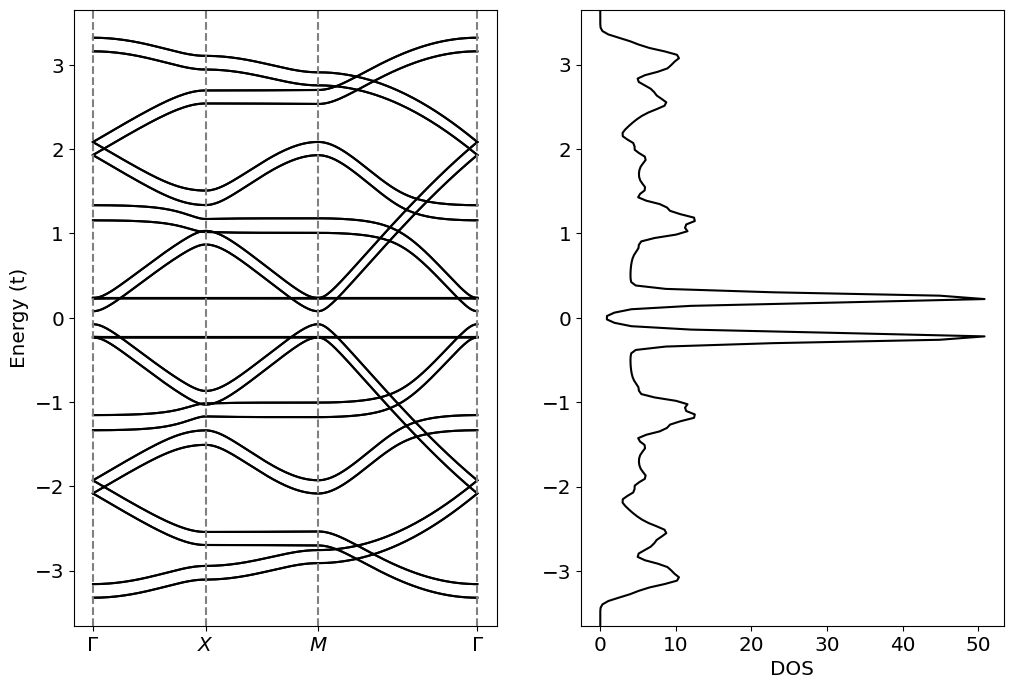

In [66]:
H = ham.get_HBdG()

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,8))
# Create two subplots and unpack the output array immediately

axes[0] = plotting.plot_bands(H, hsp_path='GXMG', ax=axes[0])
axes[1] = plotting.plot_DOS(H, sig=0.05, elim = (-4, 4), ax=axes[1], ylabel=None)

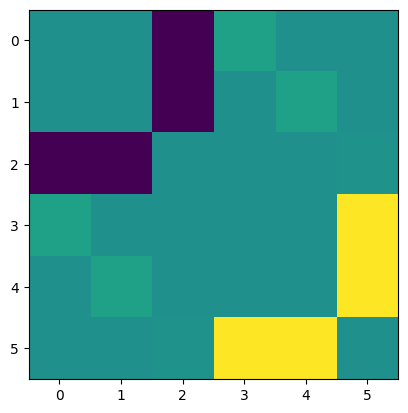

In [ ]:
H = ham.get_reducedH()
plt.imshow(np.real(H(0.7,0.7)))

In [229]:
delarr = []
Uarr = np.arange(0,10,0.5)
for U in Uarr:
    m = -U/2
    ham = hamiltonian.dDSLmodel(N=N, delta=[1,1], T=0, U=[U,U], nu=3, ns=[1,1], mu=[m,m])
    dels, nus, mus = sc_AHM.self_consistency_loop(ham, 41, HF=True, Nmax=200)
    delarr.append(dels[:,-1])

KeyboardInterrupt: 

IndexError: list index out of range

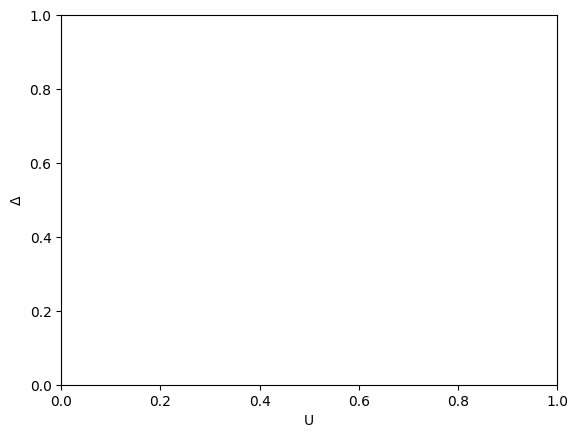

In [ ]:
plt.xlabel('U')
plt.ylabel(r'$\Delta$')
plt.plot(Uarr, [delarr[i]*U for i,U in enumerate(Uarr)], label=[r'$\Delta_B$', r'$\Delta_{A/C}$'])
plt.legend()